# Linear Regression, Ridge Regression, LASSO, ElasticNet

In [8]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib
import mglearn

w[0]: 0.393906  b: -0.031804


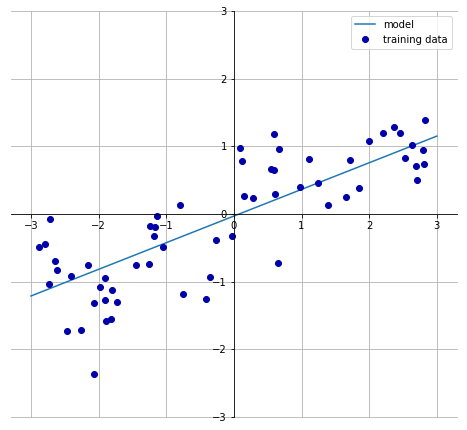

In [9]:
mglearn.plots.plot_linear_regression_wave()

**Example**

Minimize Mean Squared Error
$$RSS=\Sigma_{i=1}^n \left( y_i-\beta_0 -\Sigma_{j=1}^p \beta_jx_{ij} \right)^2$$

In [10]:
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

In [16]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746


In [18]:
print("Training set score: {:,.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:,.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.67
Test set score: 0.66


## Example on Boston Housing Database

In [19]:
X,y = mglearn.datasets.load_extended_boston()

In [21]:
type(X)

numpy.ndarray

In [22]:
X.shape

(506, 104)

In [23]:
y.shape

(506,)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [25]:
lr = LinearRegression().fit(X_train,y_train)

In [27]:
print("Training set score: {:,.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:,.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.95
Test set score: 0.61


Larege socre for training data and small score for test data is sign of overfitting. Need to control model complexity.

# Ridge Regression

Adding L2 regularization to penalize the L2 norm of coefficients. To make:
 * each coefficint as small as possible

Object function becomes
$$\Sigma_{i=1}^n(y_i-\beta_0-\Sigma_{j=1}^p\beta_j x_{ij})^2 +\alpha \Sigma_{j=1}^n \beta_j^2 = RSS+\alpha\Sigma_{j=1}^p\beta_j^2$$

In [31]:
type(sklearn)

module

In [35]:
type(sklearn.linear_model)

module

In [37]:
dir(sklearn.linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'RANSACRegressor',
 'RandomizedLasso',
 'RandomizedLogisticRegression',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'base',
 'bayes',
 'cd_fast',
 'coordinate_descent',
 'enet_path',
 'huber',
 'lars_path',
 'lasso_path',
 'lasso_stability_path',

In [43]:
from sklearn.linear_model import Ridge

In [44]:
type(Ridge)

abc.ABCMeta

In [45]:
dir(Ridge)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_preprocess_data',
 '_set_intercept',
 'fit',
 'get_params',
 'predict',
 'score',
 'set_params']

In [49]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:,.2f}".format(ridge.score(X_train,y_train)))
print("Test set score: {:,.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.89
Test set score: 0.75


## Parameter alpha

How much importance the model palces on simplicity versus training set performance can be specified by the user, using the alpha parameter. The default alpha=1. We could increase alpha to force coefficients to move more toward zero, which decreases training set performance but might help generalization.

In [50]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:,.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score: {:,.2f}".format(ridge10.score(X_test,y_test)))

Training set score: 0.79
Test set score: 0.64


Decreasting alpha allows the coefficients to be less restricted. For evry small alpha, coefficients are barely restricted at all, and we end up with a model that resembles LinearRegression 

In [51]:
ridge01 = Ridge(alpha=0.10).fit(X_train,y_train)
print("Training set score: {:,.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score: {:,.2f}".format(ridge01.score(X_test,y_test)))

Training set score: 0.93
Test set score: 0.77


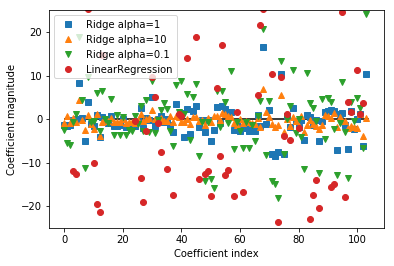

In [52]:
plt.plot(ridge.coef_,'s',label="Ridge alpha=1")
plt.plot(ridge10.coef_,'^',label="Ridge alpha=10")
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')

plt.plot(lr.coef_,'o',label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

**Plots here show model performance as a function of dataset size are called learning curves**

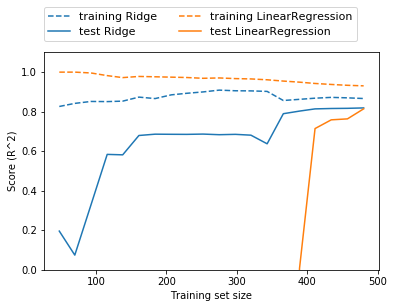

In [53]:
mglearn.plots.plot_ridge_n_samples()

# LASSO

An alternative to Ridge for regulatrizing linear regression is Lasso. Lasso uses L1 regularization. The consequence of L1 regularization is that when using the Lasso, some coefficients are exactly 0. This can be seen as a form of automatic feature selection. 

In [70]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print("Training set score: {:,.2f}".format(lasso.score(X_train,y_train)))
print("Test set score: {:,.2f}".format(lasso.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


indicate underfitting. Alter regularization parameter, alpha

In [71]:
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train,y_train)
print("Tring set score: {:,.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score: {:,.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ !=0)))

Tring set score: 0.94
Test set score: 0.74
Number of features used: 69


A lower alpha value allows us to fit a more complex model, which worked better on the training and test data.

If we use alpha too slow, wo again remove the effect of regularization and end up overfitting, with a result similar to LinearRegressin.

In [74]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)
print("Tring set score: {:,.2f}".format(lasso0001.score(X_train,y_train)))
print("Test set score: {:,.2f}".format(lasso0001.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso0001.coef_ !=0)))

Tring set score: 0.95
Test set score: 0.64
Number of features used: 94


Again, we can plot the coefficients of the different models.

Text(0,0.5,'Coefficient magnitude')

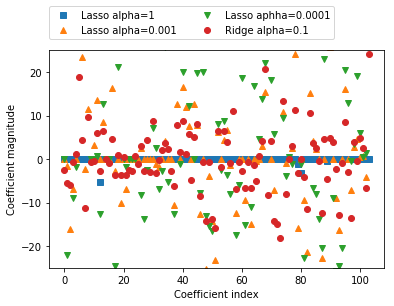

In [82]:
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.001")
plt.plot(lasso0001.coef_,'v',label="Lasso aphha=0.0001")

plt.plot(ridge01.coef_,'o',label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Concusion:
 * Ridge usually is the first choice
 * if you have many features and expect only a few to be important, Lasso is a better choice
 * scikit-learn provide the **ElasticNet** class, whchcombins the penalities of Lasso and Ridge, and have two parameters 
 
In practice, this combination works best.